In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [ ]:
# Load dataset (assuming you have uploaded it to Google Colab)
from google.colab import files
uploaded = files.upload()

# Load the CSV file into a DataFrame
data = pd.read_csv('Life Expectancy Data.csv')
print(data.head())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

**Data Cleaning and Exploration**

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values with mean for numerical columns and mode for categorical columns
data['Life expectancy '] = data['Life expectancy '].fillna(data['Life expectancy '].mean())
data['Adult Mortality'] = data['Adult Mortality'].fillna(data['Adult Mortality'].mean())
data['Alcohol'] = data['Alcohol'].fillna(data['Alcohol'].mean())
data['Hepatitis B'] = data['Hepatitis B'].fillna(data['Hepatitis B'].mode()[0])
data[' BMI '] = data[' BMI '].fillna(data[' BMI '].mean())
data['Polio'] = data['Polio'].fillna(data['Polio'].mode()[0])
data['Total expenditure'] = data['Total expenditure'].fillna(data['Total expenditure'].mean())
data['Diphtheria '] = data['Diphtheria '].fillna(data['Diphtheria '].mode()[0])
data['GDP'] = data['GDP'].fillna(data['GDP'].mean())
data['Population'] = data['Population'].fillna(data['Population'].mean())
data[' thinness  1-19 years'] = data[' thinness  1-19 years'].fillna(data[' thinness  1-19 years'].mean())
data[' thinness 5-9 years'] = data[' thinness 5-9 years'].fillna(data[' thinness 5-9 years'].mean())
data['Income composition of resources'] = data['Income composition of resources'].fillna(data['Income composition of resources'].mean())
data['Schooling'] = data['Schooling'].fillna(data['Schooling'].mean())

# Verify that there are no more missing values
print(data.isnull().sum())


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64
Country                            0
Year                               0
Status                             0
Life expectancy   

**bold text**

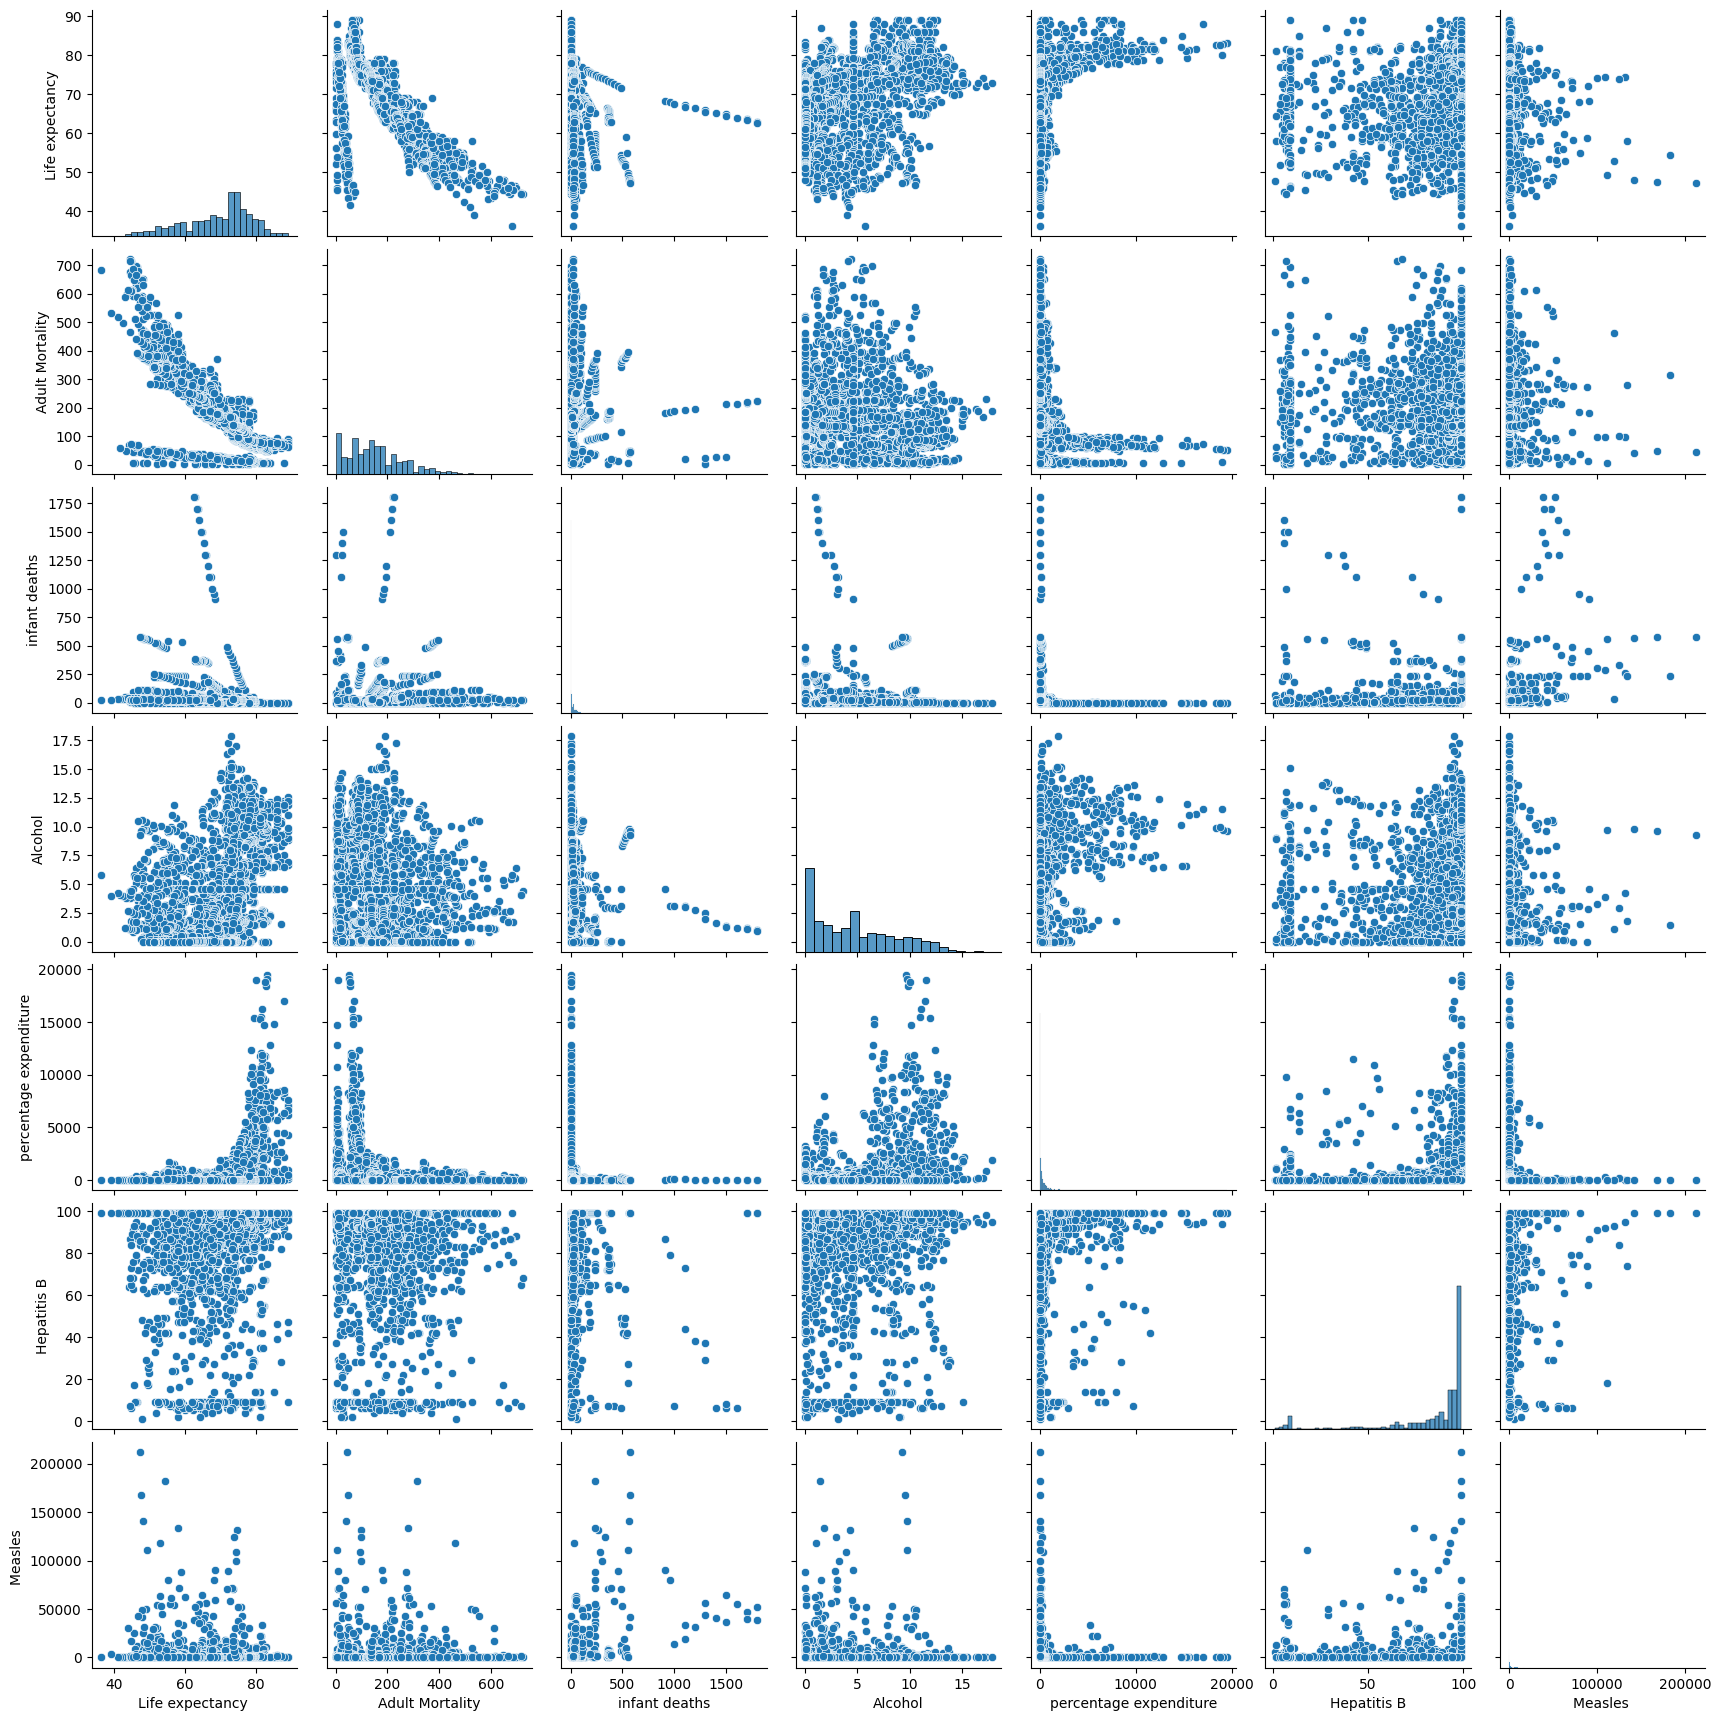

In [ ]:
# Pair plot for initial exploration
sns.pairplot(data[['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ']])
plt.show()

**Preparing Data for Training**

In [ ]:
# Independent variables
X = data[['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ']]
# Dependent variable
Y = data['Life expectancy ']

print(X.head())
print(Y.head())
print(len(X))

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape)


   Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0            263.0             62     0.01               71.279624   
1            271.0             64     0.01               73.523582   
2            268.0             66     0.01               73.219243   
3            272.0             69     0.01               78.184215   
4            275.0             71     0.01                7.097109   

   Hepatitis B  Measles   
0         65.0      1154  
1         62.0       492  
2         64.0       430  
3         67.0      2787  
4         68.0      3013  
0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64
2938
(2056, 6)


**Train Linear Regression Model**

In [ ]:
# Linear regression model
lr = LinearRegression()
lr.fit(X_train, Y_train)

# coefficients
print('Coefficients:', lr.coef_)

Coefficients: [-4.65899123e-02 -5.28239108e-03  5.08709516e-01  7.15301987e-04
  1.22732027e-02 -7.60925303e-05]


**Predictions and Evaluation**

2546    73.7
650     75.9
1740    74.2
177     76.8
1377    51.9
        ... 
1241    69.3
1456    69.9
123     86.0
2509    81.7
1728    64.0
Name: Life expectancy , Length: 882, dtype: float64
[69.2547127  76.54811878 70.77245246 75.40153024 53.50537751 55.33548342
 73.84347527 70.62991651 72.75886865 57.3384721  56.87739997 58.02497078
 72.88251474 71.86239996 65.99192005 65.9089674  59.19758339 80.71236423
 69.4248872  78.20124968 79.64998551 82.01788523 68.9784552  67.36974967
 68.80897885 67.22176489 57.45999333 63.82284977 75.11990389 69.90826061
 65.54889905 78.52926213 71.45882139 68.56563201 83.99414344 71.61325614
 72.28603214 67.90697837 65.11309917 74.6586803  59.10289989 60.74330853
 73.1897642  79.1239963  72.31361359 72.79995758 77.32181897 71.75803888
 75.47335009 67.83107646 57.49821717 72.10292073 75.8844673  75.57494595
 70.7872231  62.91984129 75.40306044 72.56222268 73.62766224 72.99132551
 78.39615681 58.87984899 70.24269251 70.80380507 58.37470398 56.81995164
 5

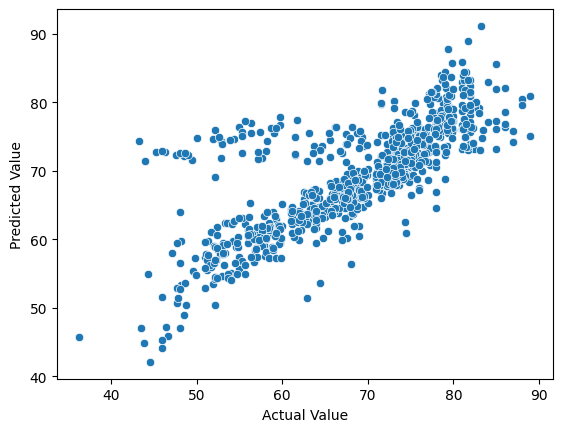

Mean Absolute Error:  4.164024326563577
Mean Squared Error:  37.88182974498796
Root Mean Squared Error 6.154821666383841


In [ ]:
# Predictions
Y_pred = lr.predict(X_test)
print(Y_test)
print(Y_pred)

# Scatter plot of actual vs predicted values
sns.scatterplot(x=Y_test, y=Y_pred)
plt.ylabel('Predicted Value')
plt.xlabel('Actual Value')
plt.show()

# Error metrics
print('Mean Absolute Error: ', mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error: ', mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error', math.sqrt(mean_squared_error(Y_test, Y_pred)))

**Residual Analysis**

Residual=Actual Value−Predicted Value

2546    4.445287
650    -0.648119
1740    3.427548
177     1.398470
1377   -1.605378
          ...   
1241    3.166629
1456    2.241479
123     9.165639
2509   -1.552743
1728    1.261506
Name: Life expectancy , Length: 882, dtype: float64


<ipython-input-15-60bd65e9bcdf>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, bins=40)


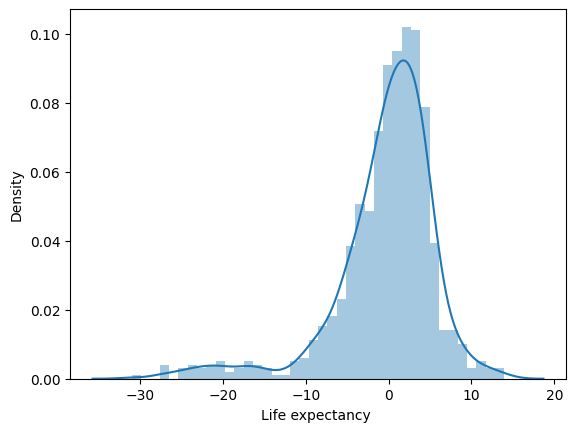

In [ ]:
residual = Y_test - Y_pred
print(residual)

# Plot residuals
sns.distplot(residual, bins=40)
plt.show()